In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path = '/path/to/data/events_LHCO2020_backgroundMC_Pythia.h5'

In [3]:
def read_file(path='', nevts=1e4):
    f = pd.read_hdf(path,stop=nevts)
    
    # change naming convention of the coulmns
    old = list(f.columns)
    new = ['pt','eta','phi']
    new = [new]*700
    new = [item for sublist in new for item in sublist]
    dictionary = dict(zip(old, new))
    df = f.rename(dictionary, axis=1)
    
    return df

def get_hadrons(df=None, trim=True):
    data    = np.array(df)
    hadrons = []
    for idx in tqdm(range(data.shape[0])):
        l = np.array(np.split(data[idx], 700))
        hadrons.append(l)
    
    hadrons = np.vstack(hadrons)
    
    if trim:
        hadrons = hadrons[~np.all(hadrons == 0., axis=1)]    
    
    hadrons = pd.DataFrame(hadrons, columns=['pt','eta','phi'])
    
    return hadrons

In [4]:
df = read_file(path)

In [5]:
df = get_hadrons(df)

100%|██████████| 10000/10000 [00:10<00:00, 940.15it/s]


In [6]:
df.shape

(1817234, 3)

<IPython.core.display.Javascript object>


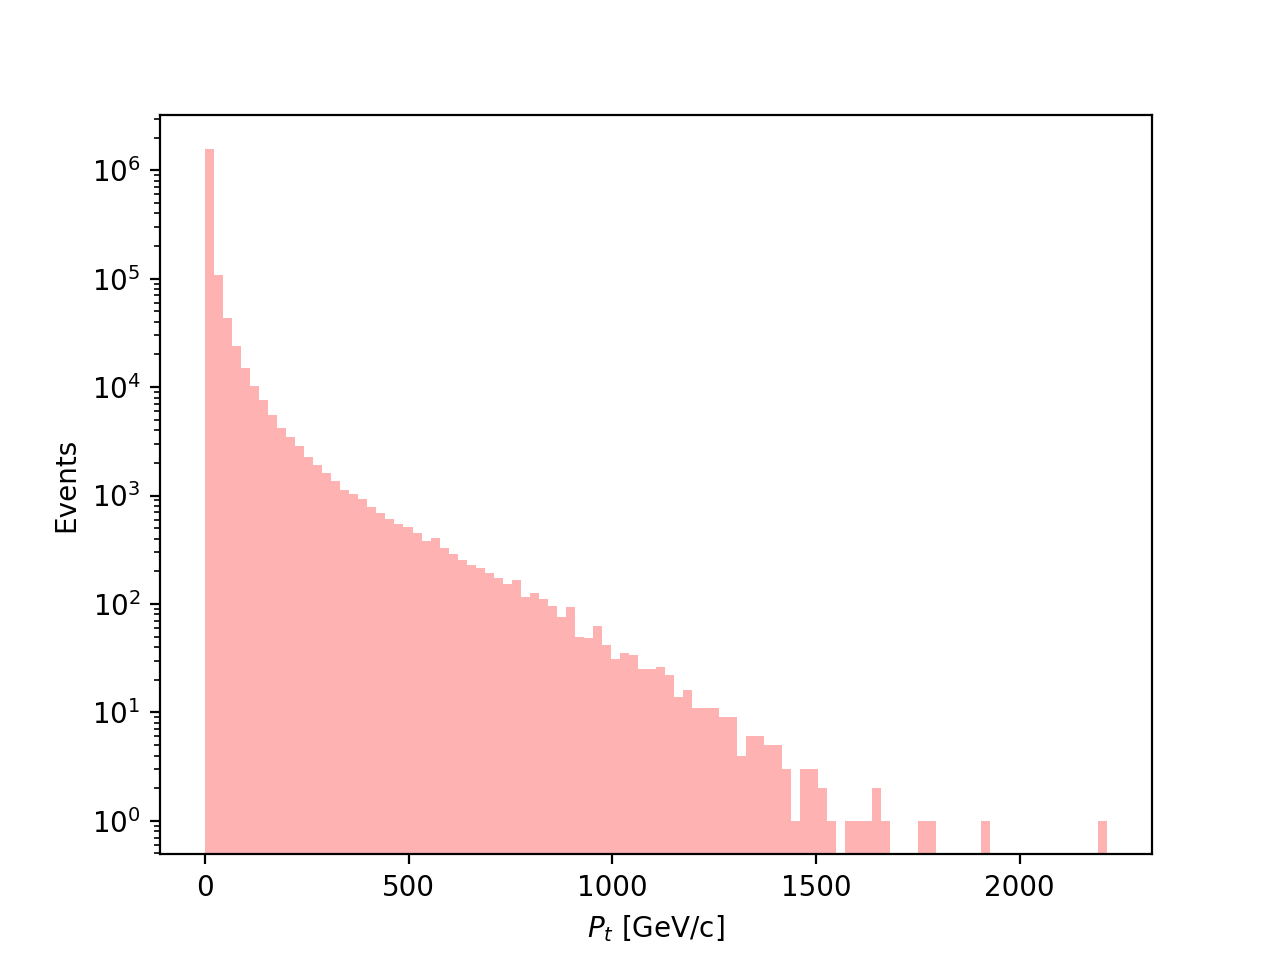

Text(0, 0.5, 'Events')

In [7]:
%matplotlib notebook
_ = plt.hist(df.pt, bins=100, color='red', alpha=0.3)
plt.semilogy()
plt.xlabel('$P_{t}$ [GeV/c]')
plt.ylabel('Events')

<IPython.core.display.Javascript object>


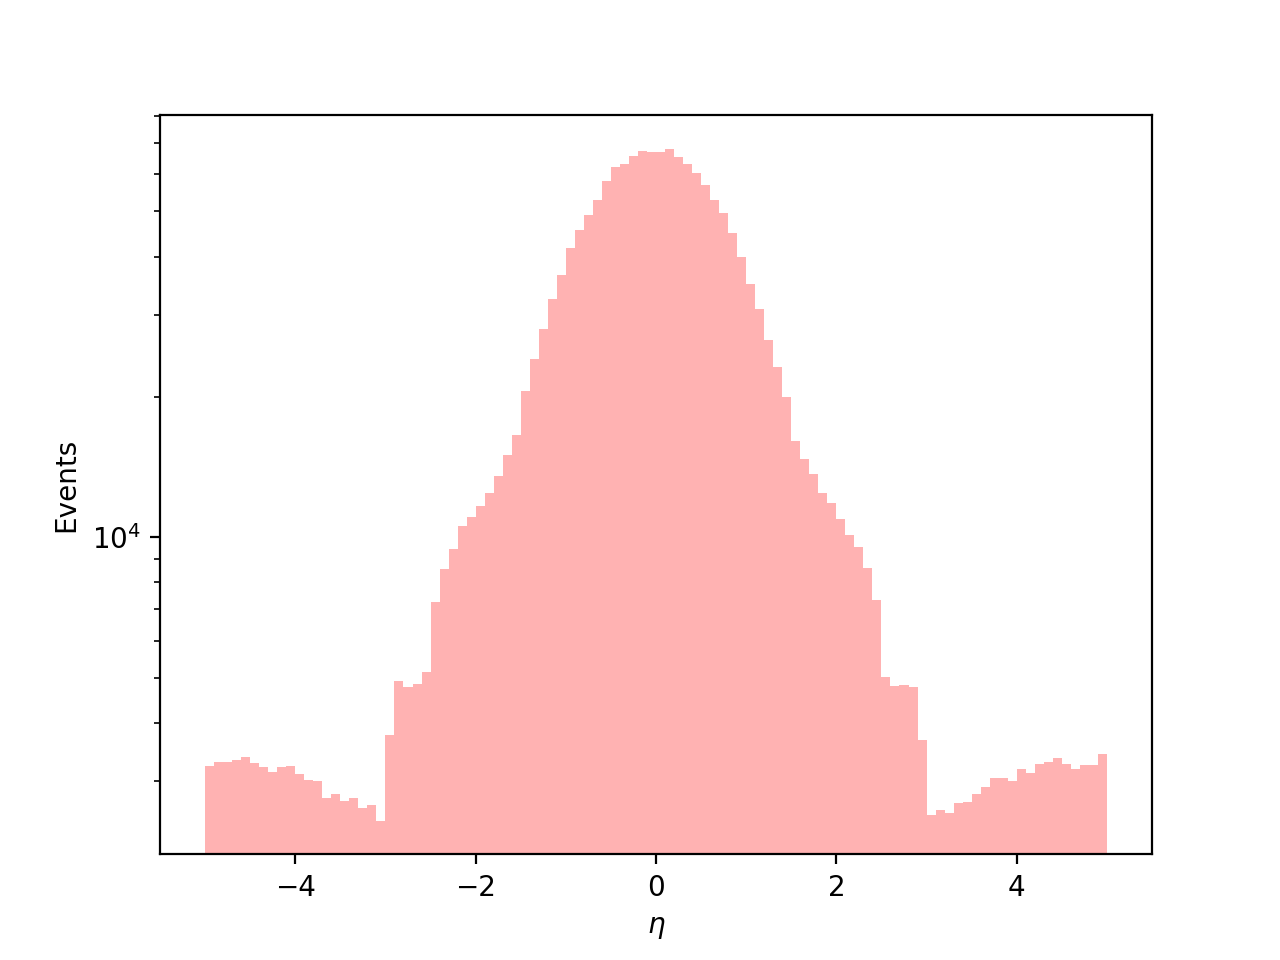

Text(0, 0.5, 'Events')

In [8]:
%matplotlib notebook
_ = plt.hist(df.eta, bins=100, color='red', alpha=0.3)
plt.semilogy()
plt.xlabel('$\eta$')
plt.ylabel('Events')

<IPython.core.display.Javascript object>


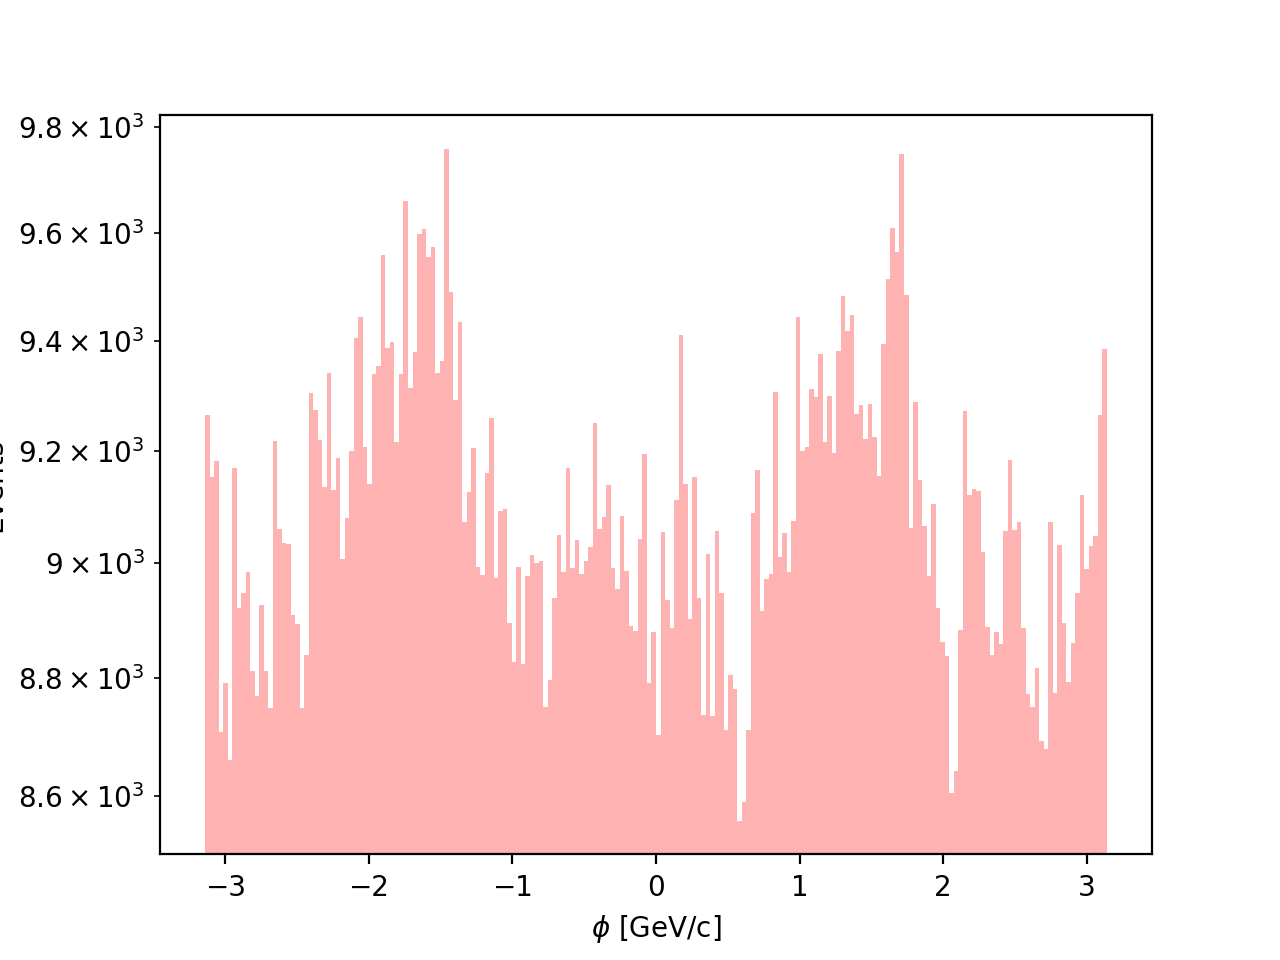

Text(0, 0.5, 'Events')

In [9]:
%matplotlib notebook
_ = plt.hist(df.phi, bins=200, color='red', alpha=0.3)
plt.semilogy()
plt.xlabel('$\phi$ [GeV/c]')
plt.ylabel('Events')